In [1]:
import cv2
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore")
%matplotlib inline

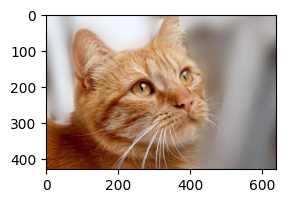

In [2]:
plt.figure(figsize=(4, 2))
imagedata = plt.imread("cat.jpg")
plt.imshow(imagedata)
plt.grid(False)
plt.show()

In [3]:
imagedata.shape[2]

3

In [4]:
print("Image Shape: {}".format(imagedata.shape))
print("Image Size is : Image Height: {},  Image Width: {} and Image Channle: {} = {}".format(imagedata.shape[0], imagedata.shape[1], imagedata.shape[2], imagedata.size))

Image Shape: (428, 640, 3)
Image Size is : Image Height: 428,  Image Width: 640 and Image Channle: 3 = 821760


In [5]:
def catimageShow(imageTitle, image):
    imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4, 2))
    plt.imshow(imageVariable)
    plt.title(imageTitle)
    plt.show()

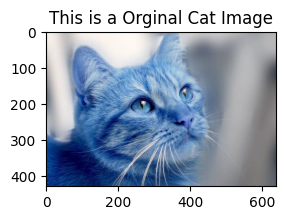

In [6]:
catimageShow("This is a Orginal Cat Image", imagedata)

In [7]:
imagedata.shape[:2]

(428, 640)

In [8]:
#mask Lider, Data Fusion
Image_mask = np.zeros(imagedata.shape[:2], dtype="uint8")

In [9]:
Image_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
cv2.rectangle(Image_mask, (0, 450), (50, 200), 255)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0]], dtype=uint8)

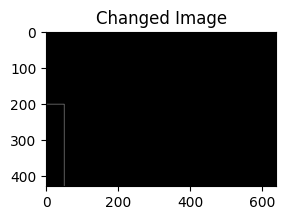

In [11]:
catimageShow("Changed Image", Image_mask)

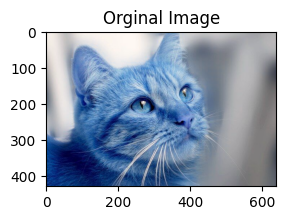

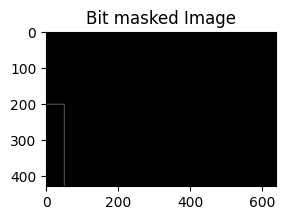

In [12]:
argmumentImage = {"Image":"cat.jpg", 
                 "scharr":0}
imagedata = plt.imread(argmumentImage["Image"])
catimageShow("Orginal Image", imagedata)
bit_mask = cv2.bitwise_and(imagedata, imagedata, mask = Image_mask)
catimageShow("Bit masked Image", Image_mask)

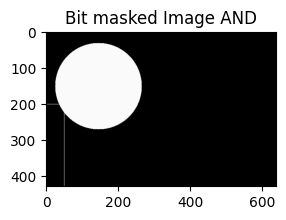

In [13]:
cv2.circle(Image_mask, (145, 150), 120, 250, -1)
bit_mask = cv2.bitwise_and(imagedata, imagedata, mask = Image_mask)
catimageShow("Bit masked Image AND", Image_mask)

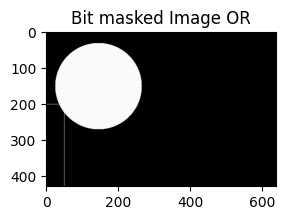

In [14]:
cv2.circle(Image_mask, (145, 150), 120, 250, -1)
bit_mask = cv2.bitwise_or(imagedata, imagedata, mask = Image_mask)
catimageShow("Bit masked Image OR", Image_mask)

In [15]:
max(imagedata[0][0])

246

In [16]:
# Image Scalling
# Normalization
# Standarization
imagedata/255

array([[[0.90980392, 0.94509804, 0.96470588],
        [0.90980392, 0.94509804, 0.96470588],
        [0.90980392, 0.94509804, 0.96470588],
        ...,
        [0.70196078, 0.70196078, 0.70196078],
        [0.70196078, 0.70196078, 0.70196078],
        [0.70196078, 0.70196078, 0.70196078]],

       [[0.90980392, 0.94509804, 0.96470588],
        [0.90980392, 0.94509804, 0.96470588],
        [0.90980392, 0.94509804, 0.96470588],
        ...,
        [0.70196078, 0.70196078, 0.70196078],
        [0.70196078, 0.70196078, 0.70196078],
        [0.70196078, 0.70196078, 0.70196078]],

       [[0.90980392, 0.94509804, 0.96470588],
        [0.90980392, 0.94509804, 0.96470588],
        [0.90980392, 0.94509804, 0.96470588],
        ...,
        [0.70196078, 0.70196078, 0.70196078],
        [0.70196078, 0.70196078, 0.70196078],
        [0.70196078, 0.70196078, 0.70196078]],

       ...,

       [[0.47843137, 0.17647059, 0.01176471],
        [0.47843137, 0.17647059, 0.01176471],
        [0.47843137, 0

In [17]:
customValueW = 120.0/imagedata.shape[1]

In [18]:
customValueH = 120.0/imagedata.shape[0]

In [19]:
120*120

14400

In [20]:
customValueW

0.1875

In [21]:
imagedata.shape[0]

428

In [22]:
280*0.4

112.0

In [23]:
imageDimention = (120, int(imagedata.shape[0]*customValueW))

In [24]:
imagedata.shape

(428, 640, 3)

In [25]:
imageDimention

(120, 80)

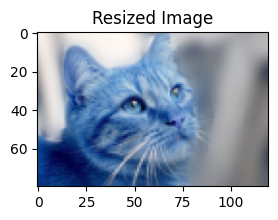

In [26]:
newImage = cv2.resize(imagedata, imageDimention, interpolation = cv2.INTER_AREA)
catimageShow("Resized Image", newImage)

In [27]:
newImage.shape

(80, 120, 3)

In [28]:
(imageH, ImageW) = imagedata.shape[:2]

In [29]:
centerX, centerY = (imageH//2, ImageW//2)

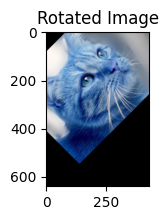

In [30]:
imageRotate = cv2.getRotationMatrix2D((centerX, centerY), 45, 1.0)
rotateNow = cv2.warpAffine(imagedata, imageRotate, (imageH, ImageW))
catimageShow("Rotated Image", rotateNow)

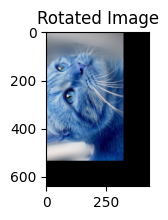

In [31]:
imageRotate = cv2.getRotationMatrix2D((centerX, centerY), 90, 1.0)
rotateNow = cv2.warpAffine(imagedata, imageRotate, (imageH, ImageW))
catimageShow("Rotated Image", rotateNow)

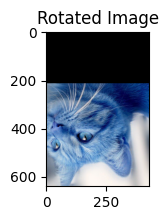

In [32]:
imageRotate = cv2.getRotationMatrix2D((centerX, centerY), 180, 1.0)
rotateNow = cv2.warpAffine(imagedata, imageRotate, (imageH, ImageW))
catimageShow("Rotated Image", rotateNow)

In [33]:
#Step 01: Convert iMages to Gray
grayimage = cv2.cvtColor(imagedata, cv2.COLOR_RGB2GRAY)

In [34]:
grayimage.shape

(428, 640)

In [35]:
kernelGen = -1 if argmumentImage["scharr"] > 0 else 3 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


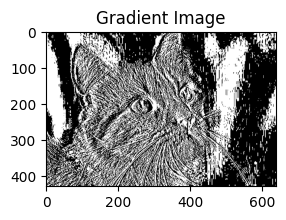

In [36]:
gradienImageDataX = cv2.Sobel(grayimage, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = kernelGen)
gradienImageDataY = cv2.Sobel(grayimage, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = kernelGen)
catimageShow("Gradient Image", gradienImageDataX)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


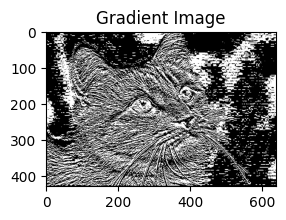

In [37]:
catimageShow("Gradient Image", gradienImageDataY)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


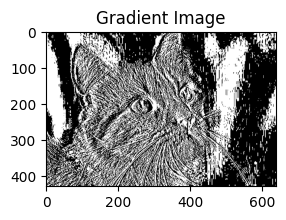

In [38]:
catimageShow("Gradient Image", gradienImageDataX)

In [39]:
gradienImageDataX

array([[ 0.,  0.,  4., ...,  4.,  0.,  0.],
       [ 0.,  0.,  3., ...,  3.,  0.,  0.],
       [ 0.,  1.,  1., ...,  1.,  1.,  0.],
       ...,
       [ 0., -1., -8., ...,  0., -4.,  0.],
       [ 0., -4., -5., ...,  0., -4.,  0.],
       [ 0., -6., -4., ...,  0., -4.,  0.]], dtype=float32)

In [40]:
gradienImageDataY

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., -1., ...,  1.,  0.,  0.],
       [-2., -1., -1., ...,  1.,  1.,  2.],
       ...,
       [38., 37., 38., ...,  0.,  0.,  0.],
       [42., 40., 39., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)